In [211]:
# Name : Taukir Shekh[19DCS134]
import numpy as np
import matplotlib.pyplot as plt
import random

In [212]:
def est_cof(x,y):
  n=np.size(x)
  m_x=np.mean(x)
  m_y=np.mean(y)

  SS_xy=np.sum(y*x)-n*m_y*m_x
  SS_xx=np.sum(x*x)-n*m_x*m_x

  b1=SS_xy/SS_xx
  b0=m_y-b1*m_x

  return(b0,b1)  

In [213]:
n=40
x1,y1=[],[]
for i in range(1, n+1):
  x1.append(i)
  y1.append(random.randint(1,n+1))
x,y=np.array(x1),np.array(y1)
y

array([33, 29,  9, 19, 10, 19, 41, 14,  9, 16, 39, 17, 19, 27, 39,  5, 11,
       36, 11, 16, 21, 24,  1, 30,  3, 23, 19,  9, 19,  9, 30, 37, 14, 18,
       26, 38, 39, 23, 37, 28])

In [214]:
b=est_cof(x,y)
print("\n Estimated Coefficient :\n b_0 : {}\n b_1 : {}\n".format(b[0],b[1]))

y_pred=b[0]+b[1]*x
print(y_pred)


 Estimated Coefficient :
 b_0 : 18.48846153846154
 b_1 : 0.15544090056285179

[18.64390244 18.79934334 18.95478424 19.11022514 19.26566604 19.42110694
 19.57654784 19.73198874 19.88742964 20.04287054 20.19831144 20.35375235
 20.50919325 20.66463415 20.82007505 20.97551595 21.13095685 21.28639775
 21.44183865 21.59727955 21.75272045 21.90816135 22.06360225 22.21904315
 22.37448405 22.52992495 22.68536585 22.84080675 22.99624765 23.15168856
 23.30712946 23.46257036 23.61801126 23.77345216 23.92889306 24.08433396
 24.23977486 24.39521576 24.55065666 24.70609756]


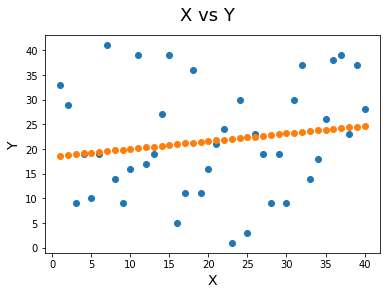

In [215]:
# Graph of X vs Y
fig=plt.figure()
plt.scatter(x,y)
plt.scatter(x,y_pred)
fig.suptitle('X vs Y', fontsize=18)
plt.xlabel('X', fontsize=14)
plt.ylabel('Y', fontsize=14)
plt.show()

In [226]:
from sklearn.linear_model import LinearRegression
import pandas as pd

from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/Datasets/
%ls

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/MyDrive/Datasets
 Admission_Predict.csv
 Admission_Predict_Ver1.1.csv
'Breast Cancer Wisconsin Dataset.csv'
 cwurData.csv
 data.csv
 dataset_31_credit-g.csv
'default of credit card clients (1).xlsx'
'FIFA 19 Dataset.csv'


In [227]:
df=pd.read_csv('Admission_Predict_Ver1.1.csv')
df.head(3)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72


In [237]:
find='Chance of Admit '
y=df[find]
x=df.drop([find,'Serial No.'],axis=1,inplace=False)

In [246]:
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [239]:
regs=LinearRegression().fit(x,y)
regs.score(x,y)

0.8219007395178417

In [240]:
regs.coef_

array([0.00185851, 0.00277797, 0.00594137, 0.00158614, 0.01685874,
       0.11838505, 0.02430748])

In [241]:
regs.intercept_

-1.2757250829969908

In [242]:
y_pred1 = regs.predict(x)
y_pred1

array([0.95188302, 0.80403133, 0.65344812, 0.7445193 , 0.63154964,
       0.87449345, 0.70873689, 0.59658817, 0.55037924, 0.7166568 ,
       0.73230708, 0.8361088 , 0.85258378, 0.64376819, 0.64333755,
       0.64765144, 0.71535936, 0.65773635, 0.73739029, 0.65098033,
       0.61722139, 0.7016542 , 0.92700657, 0.96173916, 0.9588498 ,
       0.9630366 , 0.76315152, 0.51895532, 0.42608928, 0.48762151,
       0.60173397, 0.71664474, 0.92176606, 0.93714633, 0.95539958,
       0.85995516, 0.65453013, 0.53816237, 0.50482378, 0.58365522,
       0.6476116 , 0.65630992, 0.68337649, 0.84196389, 0.88546532,
       0.83497493, 0.89804598, 0.93750178, 0.80611696, 0.75506225,
       0.68278595, 0.61474312, 0.71933504, 0.69304722, 0.65695951,
       0.5898518 , 0.54253815, 0.50480029, 0.43058924, 0.622548  ,
       0.60248697, 0.62091394, 0.64323028, 0.70633145, 0.74818254,
       0.78373966, 0.78968732, 0.73240017, 0.8247072 , 0.8603845 ,
       0.95657045, 0.96154284, 0.89418791, 0.80071339, 0.76281

In [243]:
mae = sum(y-y_pred1)/y.count()
print(mae)

-5.623279619726418e-16


In [244]:
rmse = ((sum((y-y_pred1)**2))**0.5)/y.count()
print(rmse)

0.002661109115483281


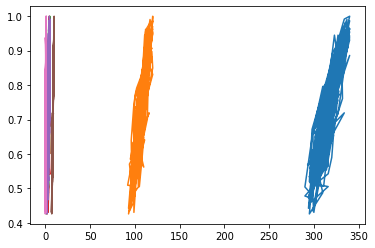

In [245]:
import matplotlib.pyplot as plt
plt.plot(x,y_pred1)